# Kernel Ridge Regression Practice

Implementation of featurized ridge regression the naive way, and then using kernels.

### Imports and Helper Functions

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns
sns.set_style("white")

In [2]:
# Make a result directory to store plots
os.makedirs("./result", exist_ok=True)

In [3]:
def heatmap(f, clip=True):
    '''
    Function to generate a heatmap of a dataset
    '''
    # example: heatmap(lambda x, y: x * x + y * y)
    xx = yy = np.linspace(np.min(X), np.max(X), 72)
    x0, y0 = np.meshgrid(xx, yy)
    x0, y0 = x0.ravel(), y0.ravel()
    z0 = f(x0, y0)

    if clip:
        z0[z0 > 5] = 5
        z0[z0 < -5] = -5

    plt.hexbin(x0, y0, C=z0, gridsize=50, cmap=cm.jet, bins=None)
    plt.colorbar()
    cs = plt.contour(
        xx, yy, z0.reshape(xx.size, yy.size), [-2, -1, -0.5, 0, 0.5, 1, 2], cmap=cm.jet)
    plt.clabel(cs, inline=1, fontsize=10)

    pos = y[:] == +1.0
    neg = y[:] == -1.0
    plt.scatter(X[pos, 0], X[pos, 1], c='red', marker='+')
    plt.scatter(X[neg, 0], X[neg, 1], c='blue', marker='v')


In [4]:
data_names = ['circle', 'heart', 'asymmetric']

## Visualize the Datasets



In [5]:
def viz_data(X, y):
    '''
    Function to visualize the dataset. Label the points with different y values with different colors
    
    Inputs:
        - X: n x 2 data matrix that represents the coordinates of our data points
        - y: n x 1 vector that represents the class labels for our data points
        
    Outputs:
        - None: Do not return anything. Just plot the data using a scatter plot
    '''
    
    new_X = []
    new_Y = []
    for i in range(len(X)):
        new_X.append(X[i][0])
        new_Y.append(X[i][1])
        
    plt.scatter(new_X, new_Y, c=y, cmap=cm.colors.ListedColormap(['red', 'blue']))


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


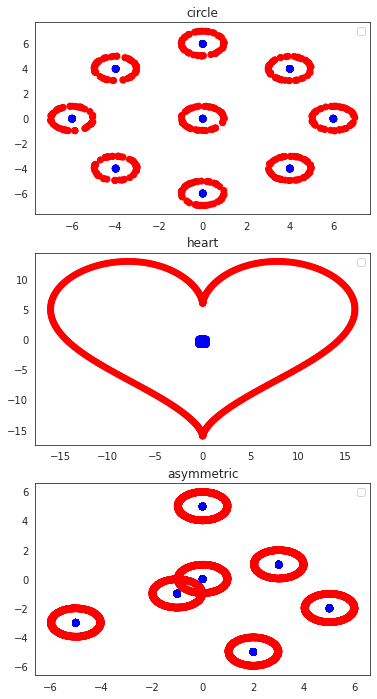

In [6]:
plt.figure(figsize=[6,12])
for i, dataset in enumerate(data_names):
    data = np.load(dataset + '.npz')
    X = data["x"]
    y = data["y"]
    
    plt.subplot(3,1,i+1)
    
    viz_data(X, y)
    
    plt.legend()
    plt.title(dataset)
plt.savefig("./result/vis_data.png")
plt.show()

You should have noticed that all of the points that are labeled with +1 are at the center of the points that are labeled -1. Therefore, the data is currently not linearly separable, and none of our linear classifiers will work! To solve this problem, we will featurize the data matrix to "lift" the data up into a higher dimension where it is linearly separable.

## (b) Polynomial Regression (Non-kernel)



In [7]:
def featurize(X, D):
    '''
    Create a vector of polynomial features up to order D from x
    Your features do not need to include binomial coefficients.
    For instance, you do not need to have (sqrt(2) * x_1 * x_2), (x_1 * x_2) is sufficient
    
    Inputs:
        - X: n x 2 data matrix 
        - D: Order of the polynomial features
        
    Outputs:
        - Featurized_X: n x k featurized data matrix (Note that k does not equal D!)
    '''
    
    n_features = []
    for d in range(D+1):
        for d2 in range(D - d + 1):
            n_features.append((X[:,0]**d) * (X[:, 1]**d2))
    
    return np.column_stack(n_features)
    
    
    

def ridge_regression(X, y, lambda_=0):
    '''
    Compute the weight vector w that is determined by the closed-form ridge regression solution
    
    Inputs:
        - X: n x d data matrix
        - y: n x 1 vector for labels
        - lambda_: Regularization hyperparameter
    
    Outputs:
        - w: d x 1 weight vector
    '''
    w = np.linalg.solve(X.T @ X + lambda_ * np.eye(X.shape[1]), X.T @ y)
    return w

def ridge_error(X, y, w):
    '''
    Compute the average squared loss given X, y, and w
    
    Inputs:
        - X: n x d data matrix
        - y: n x 1 vector for labels
        - w: d x 1 weight vector
    
    Outputs:
        - error: scalar value
    '''
    
    error = np.average(np.square(y - X @ w))
    return error


p =  1   train_error =   0.997088  validation_error =   0.997579
p =  2   train_error =   0.995537  validation_error =   1.001056
p =  3   train_error =   0.992699  validation_error =   1.019350
p =  4   train_error =   0.943011  validation_error =   0.997914
p =  5   train_error =   0.935550  validation_error =   1.028597
p =  6   train_error =   0.547155  validation_error =   0.585688
p =  7   train_error =   0.545015  validation_error =   0.582007
p =  8   train_error =   0.230190  validation_error =   0.249990
p =  9   train_error =   0.229760  validation_error =   0.251135
p = 10   train_error =   0.174273  validation_error =   0.192998
p = 11   train_error =   0.174073  validation_error =   0.193297
p = 12   train_error =   0.156723  validation_error =   0.175335
p = 13   train_error =   0.156671  validation_error =   0.175490
p = 14   train_error =   0.145787  validation_error =   0.164745
p = 15   train_error =   0.145784  validation_error =   0.164816
p = 16   train_error =   

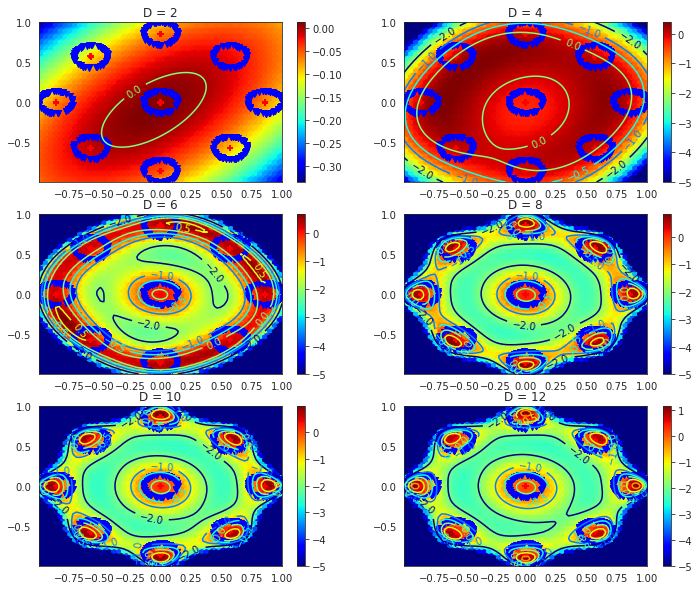

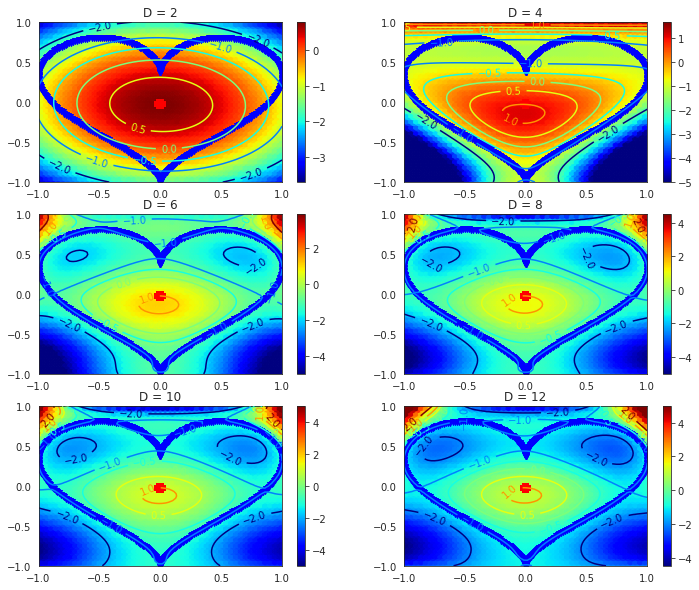

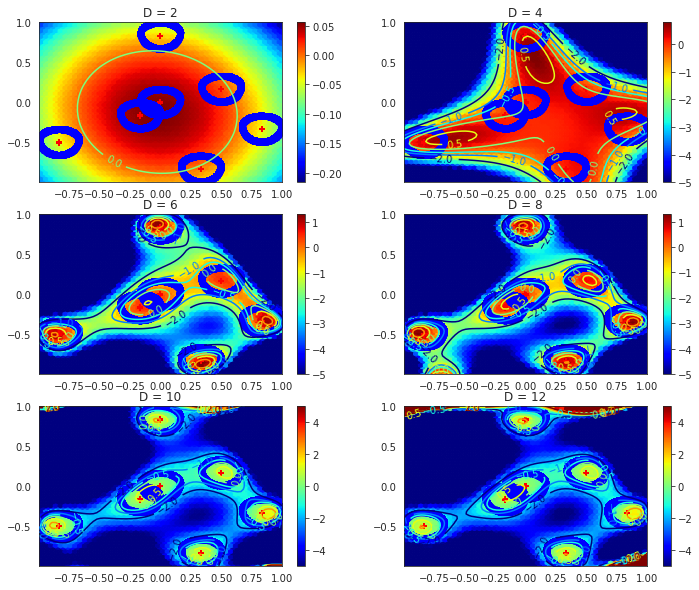

In [8]:
for ds in ['circle', 'heart', 'asymmetric']:
    data = np.load(f'{ds}.npz')

    SPLIT = 0.8
    X = data["x"]
    y = data["y"]
    X /= np.max(X)  # normalize the data

    n_train = int(X.shape[0] * SPLIT)
    X_train = X[:n_train:, :]
    X_valid = X[n_train:, :]
    y_train = y[:n_train]
    y_valid = y[n_train:]



    LAMBDA = 0.001
    isubplot = 0
    fig = plt.figure(figsize=[12,10])
    for D in range(1, 17):
        Xd_train = featurize(X_train, D)
        Xd_valid = featurize(X_valid, D)
        w = ridge_regression(Xd_train, y_train, LAMBDA)
        error_train = ridge_error(Xd_train, y_train, w)
        error_valid = ridge_error(Xd_valid, y_valid, w)
        if D in [2, 4, 6, 8, 10, 12]:
            isubplot += 1
            plt.subplot(3,2,isubplot)
            heatmap(lambda x, y: featurize(np.vstack([x, y]).T, D) @ w)
            plt.title("D = %d" % D)
            
        print("p = {:2d}   train_error = {:10.6f}  validation_error = {:10.6f}".
              format(D, error_train, error_valid))
    fig.savefig(f"./result/{ds}_non_kernel.png")

## Polynomial Kernel Ridge Regression



In [9]:
def poly_kernel(X, XT, D):
    '''
    Create the polynomial order D kernel matrix from X and X^T
    
    Inputs:
        - X: n x d data matrix
        - XT: n x d data matrix (does not have to be the same matrix as X)
        - D: Degree of the polynomial
    
    Outputs:
        - K: n x n kernel matrix 
    '''
    K = np.power(X @ XT + 1, D)
    return K

def kernel_ridge_regression(X, y, kernel_func, kernel_param):
    '''
    Perform kernel ridge regression by computing the alpha coefficient that is associated with the kernelized version
    of the closed-form ridge regression solution
    
    You are not required to use this skeleton code if you have an alternative method of computing the kernel
    ridge regression predictions. This skeleton code is only here to help you.
    
    If you are stuck, review "Kernel Ridge Regression: Theory" from the homework
    
    Inputs:
        - X: n x d training data matrix
        - y: n x 1 vector for training labels
        - kernel_func: Kernel function to be used in ridge regression
        - kernel_param: Extra parameters needed for kernel function (i.e. D or sigma)
    
    Outputs:
        - alpha: n x 1 vector
    '''
    
    K = kernel_func(X, X.T, kernel_param) + 0.001 * np.eye(X.shape[0])
    alpha = np.linalg.solve(K, y)
    return alpha

def kernel_ridge_error(X, XT, y, alpha, kernel_func, kernel_param):
    '''
    Compute the average squared loss given X, XT, y, and alpha
    
    Inputs:
        - X: n x d data matrix
        - XT: n x d data matrix (does not have to be the same matrix as X)
        - y: n x 1 vector for labels
        - alpha: n x 1 vector
        - kernel_func: Kernel function to be used in ridge regression
        - kernel_param: Extra parameters needed for kernel function (i.e. D or sigma)
    
    Outputs:
        - error: scalar value
    '''
    
    error = np.average(np.square(y - poly_kernel(X, XT, kernel_param)@alpha))
    return error

p =  1   train_error = 0.997088  validation_error = 0.997579 
p =  2   train_error = 0.995537  validation_error = 1.001056 
p =  3   train_error = 0.992699  validation_error = 1.019356 
p =  4   train_error = 0.943011  validation_error = 0.997941 
p =  5   train_error = 0.935539  validation_error = 1.029308 
p =  6   train_error = 0.511241  validation_error = 0.547531 
p =  7   train_error = 0.507592  validation_error = 0.549927 
p =  8   train_error = 0.086389  validation_error = 0.101056 
p =  9   train_error = 0.081809  validation_error = 0.097989 
p = 10   train_error = 0.043086  validation_error = 0.054167 
p = 11   train_error = 0.013966  validation_error = 0.018290 
p = 12   train_error = 0.008685  validation_error = 0.011348 
p = 13   train_error = 0.006517  validation_error = 0.008556 
p = 14   train_error = 0.003665  validation_error = 0.004821 
p = 15   train_error = 0.001912  validation_error = 0.002475 
p =  1   train_error = 0.962643  validation_error = 0.959952 
p =  2  

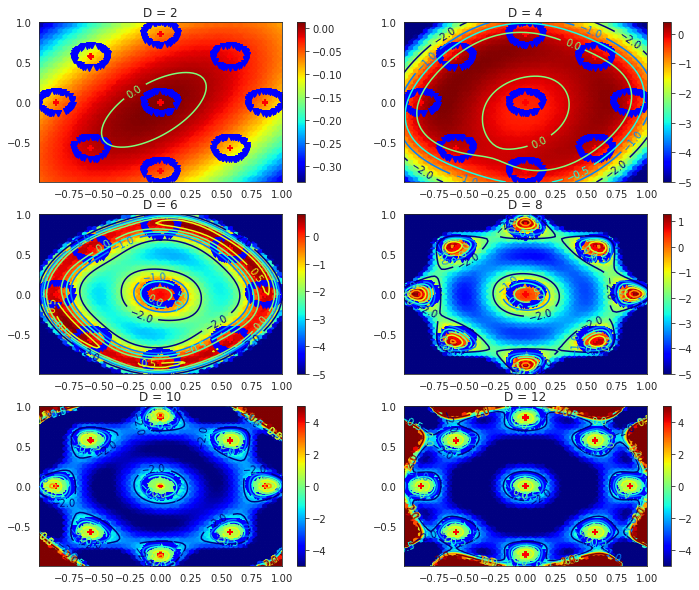

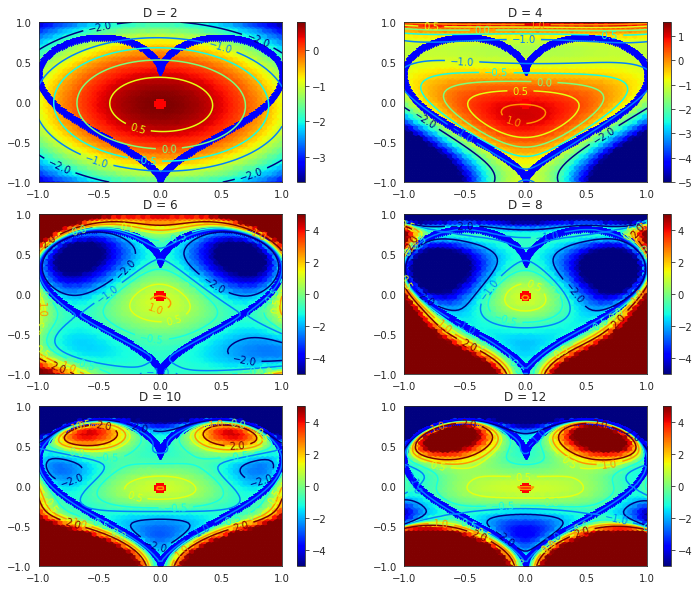

In [10]:
for ds in ['circle', 'heart']:
    data = np.load(f'{ds}.npz')

    SPLIT = 0.8
    X = data["x"]
    y = data["y"]
    X /= np.max(X)  # normalize the data

    n_train = int(X.shape[0] * SPLIT)
    X_train = X[:n_train:, :]
    X_valid = X[n_train:, :]
    y_train = y[:n_train]
    y_valid = y[n_train:]

    isubplot = 0
    fig = plt.figure(figsize=[12,10])
    for D in range(1, 16):
        alpha = kernel_ridge_regression(X_train, y_train, poly_kernel, D)
        error_train = kernel_ridge_error(X_train, X_train.T, y_train, alpha, poly_kernel, D)
        error_valid = kernel_ridge_error(X_valid, X_train.T, y_valid, alpha, poly_kernel, D)
        print("p = {:2d}   train_error = {:7.6f}  validation_error = {:7.6f} ".
                format(D, error_train, error_valid))
        if D in [2, 4, 6, 8, 10, 12]:
            isubplot += 1
            plt.subplot(3,2,isubplot)
            heatmap(lambda x, y: poly_kernel(np.column_stack([x, y]), X_train.T, D) @ alpha)
            plt.title("D = %d" % D)
    #plt.show();
    #fig = plt.figure()
    fig.savefig(f"./result/{ds}_kernel.png")

The heatmaps for values of D=2 and D=4 appear to be the same. They start to differ once D=6 and up. This difference is likely occuring due to the poly kernel function that we implement for the polynomial ridge regression.

## RBF Kernel Ridge Regression



In [11]:
def rbf_kernel(X, XT, sigma):
    '''
    Create the rbf kernel matrix from X and X^T
    
    Inputs:
        - X: n x d data matrix
        - XT: n x d data matrix (does not have to be the same matrix as X)
        - sigma: RBF kernel parameter
    
    Outputs:
        - K: n x n kernel matrix 
    '''
    X_two = (-2 * X@XT) + np.sum(X*X, axis=1, keepdims=True) + np.sum(XT * XT, axis=0, keepdims=True)
    return np.exp(-X_two / (2*sigma**2))

sigma = 10.000 train_error = 4178737234263.818359 validation_error = 5115702037074.800781
sigma =  3.000 train_error = 5036016.436545 validation_error = 6022655.729692
sigma =  1.000 train_error = 10.069792 validation_error = 10.004293
sigma =  0.300 train_error = 58.002406 validation_error = 58.180505
sigma =  0.100 train_error = 531.057356 validation_error = 531.272325
sigma =  0.030 train_error = 6403.338034 validation_error = 6403.603979


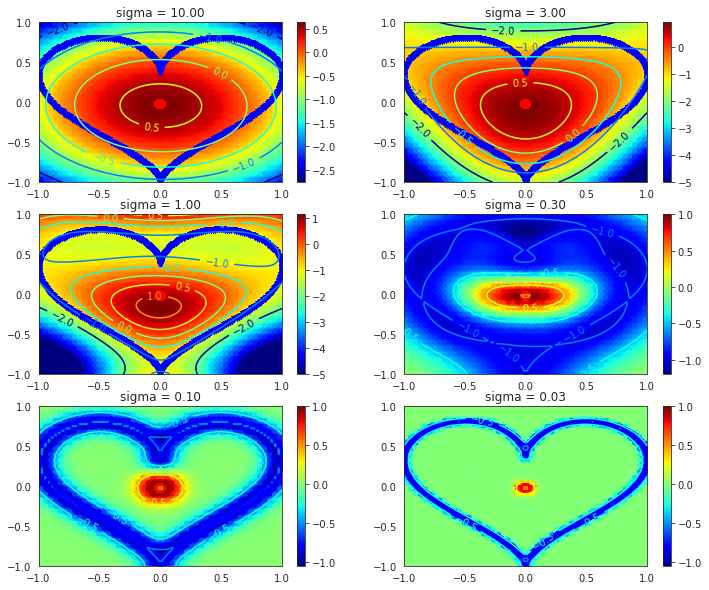

In [12]:
# data = np.load('circle.npz')
data = np.load('heart.npz')
# data = np.load('asymmetric.npz')

SPLIT = 0.8
X = data["x"]
y = data["y"]
X /= np.max(X)  # normalize the data

n_train = int(X.shape[0] * SPLIT)
X_train = X[:n_train:, :]
eX_valid = X[n_train:, :]
y_train = y[:n_train]
y_valid = y[n_train:]

fig = plt.figure(figsize=[12,10])
isubplot = 0
for sigma in [10, 3, 1, 0.3, 0.1, 0.03]:

    alpha = kernel_ridge_regression(X_train, y_train, rbf_kernel, sigma)
    error_train = kernel_ridge_error(X_train, X_train.T, y_train, alpha, rbf_kernel, sigma)
    error_valid = kernel_ridge_error(X_valid, X_train.T, y_valid, alpha, rbf_kernel, sigma)    
    print("sigma = {:6.3f} train_error = {:7.6f} validation_error = {:7.6f}".
            format(sigma, error_train, error_valid))
    isubplot += 1
    plt.subplot(3,2,isubplot)
    heatmap(lambda x, y: rbf_kernel(np.column_stack([x, y]), X_train.T, sigma) @ alpha)
    plt.title("sigma = %.2f" % sigma)
fig.savefig("./result/heart_rbf.png")
#plt.show();

As the sigma decreases, the heatmap sharpens, visualized by the lack of red/orange colors in the heatmaps.